In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
#check for missing values
df.isnull().values.any()

False

In [5]:
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [6]:
df.size

460080

In [7]:
df[ "FullDate" ] = pd.to_datetime(df[ "FullDate" ]) #convert column to datetime
df.set_index( "FullDate" , inplace= True )
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [8]:
df_daily = df.resample( 'D' ).mean()

Text(0, 0.5, 'ElecPrice')

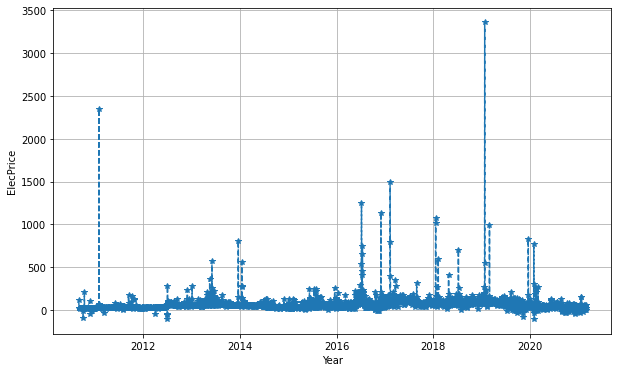

In [9]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'ElecPrice' )

In [10]:
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,15.8,1731.890833,3.69,114.654167
2010-09-02,15.4,1620.791250,3.69,23.783750
2010-09-03,18.3,1736.073333,4.45,21.040625
2010-09-04,13.7,1484.920208,3.39,20.928125
2010-09-05,14.9,1483.808750,4.45,20.856458


In [11]:
#df[ "Date" ] = pd.to_datetime(df[ "Date" ]) #convert column to datetime
#df.set_index( "Date" , inplace= True )
#df.head()

In [12]:
#df1 = df.groupby('Date')[['ElecPrice']].mean()
#df1.head()

In [13]:
df_daily = df_daily.reset_index()
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,15.8,1731.890833,3.69,114.654167
1,2010-09-02,15.4,1620.791250,3.69,23.783750
2,2010-09-03,18.3,1736.073333,4.45,21.040625
3,2010-09-04,13.7,1484.920208,3.39,20.928125
4,2010-09-05,14.9,1483.808750,4.45,20.856458


In [14]:
df_daily = df_daily.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
df_daily.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,15.8,1731.890833,3.69,114.654167
1,2010-09-02,15.4,1620.791250,3.69,23.783750
2,2010-09-03,18.3,1736.073333,4.45,21.040625
3,2010-09-04,13.7,1484.920208,3.39,20.928125
4,2010-09-05,14.9,1483.808750,4.45,20.856458


In [16]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print('Critical Values:')
for k, v in adf_result[ 4 ].items():
  print(f'{k}:{v}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -2.902766697165181
p-value: 0.045027212884625294
No. of lags used: 27
No. of observations used : 3806
Critical Values:
1%:-3.4320693157877544
5%:-2.8622996992165364
10%:-2.5671743978048323


In [17]:
adf_result = adfuller(df_daily['SysLoad'])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print('Critical Values:')
for k, v in adf_result[ 4 ].items():
  print(f'{k}:{v}')

ADF Statistic: -3.6901589888366413
p-value: 0.0042537255045741835
No. of lags used: 30
No. of observations used : 3803
Critical Values:
1%:-3.432070672988693
5%:-2.8623002987378547
10%:-2.567174716967499


In [18]:
test_size = 3834 - 2757
df_train = df_daily[:-test_size]
df_test = df_daily[-test_size:]

In [19]:
df_train.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,15.8,1731.890833,3.69,114.654167
1,2010-09-02,15.4,1620.791250,3.69,23.783750
2,2010-09-03,18.3,1736.073333,4.45,21.040625
3,2010-09-04,13.7,1484.920208,3.39,20.928125
4,2010-09-05,14.9,1483.808750,4.45,20.856458


Main Data

In [20]:
df = df.reset_index()
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [21]:
df = df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [22]:
test_size = 3834 - 2757
df_train1 = df[:-test_size]
df_test1 = df[-test_size:]

In [23]:
model = Prophet()
model.fit(df_train1)
#predict for the next 10 days
forecast = model.predict(df_test.drop(columns="y"))
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds       yhat  yhat_lower  yhat_upper
0 2018-03-20  82.117874 -199.038365  336.310441
1 2018-03-21  74.751631 -204.382756  358.188107
2 2018-03-22  85.467452 -186.324240  365.350455
3 2018-03-23  87.367970 -175.114449  353.214926
4 2018-03-24  70.474186 -220.488125  341.012002


In [24]:
y_true = df['y'][-1077:].values
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 64.562
RMSE: 116.976121


In [25]:
actual = y_true
forecasted = y_pred
# Consider a list APE to store the
# APE value for each of the records in dataset
APE = []
  
# Iterate over the list values
for day in range(5):
  
    # Calculate percentage error
    per_err = (actual[day] - forecasted[day]) / actual[day]
  
    # Take absolute value of
    # the percentage error (APE)
    per_err = abs(per_err)
  
    # Append it to the APE list
    APE.append(per_err)
  
# Calculate the MAPE
MAPE = sum(APE)/len(APE)
  
# Print the MAPE value and percentage
print(f'''
MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } %
''')


MAPE   : 13.8
MAPE % : 1380.26 %



UniVariate

In [26]:
model = Prophet()
model.fit(df_train)
#predict for the next 10 days
forecast = model.predict(df_test.drop(columns="y"))
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2018-03-20  105.534007    3.765851  207.711768
1 2018-03-21  111.923322   10.512548  205.669681
2 2018-03-22  116.048979   15.799668  207.508410
3 2018-03-23  107.388138   -2.163234  197.901846
4 2018-03-24   93.855705   -5.120452  187.708369


In [27]:
y_true = df_daily['y'][-1077:].values
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 72.453
RMSE: 133.843867


In [28]:
actual = y_true
forecasted = y_pred
# Consider a list APE to store the
# APE value for each of the records in dataset
APE = []
  
# Iterate over the list values
for day in range(5):
  
    # Calculate percentage error
    per_err = (actual[day] - forecasted[day]) / actual[day]
  
    # Take absolute value of
    # the percentage error (APE)
    per_err = abs(per_err)
  
    # Append it to the APE list
    APE.append(per_err)
  
# Calculate the MAPE
MAPE = sum(APE)/len(APE)
  
# Print the MAPE value and percentage
print(f'''
MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } %
''')


MAPE   : 0.34
MAPE % : 33.59 %



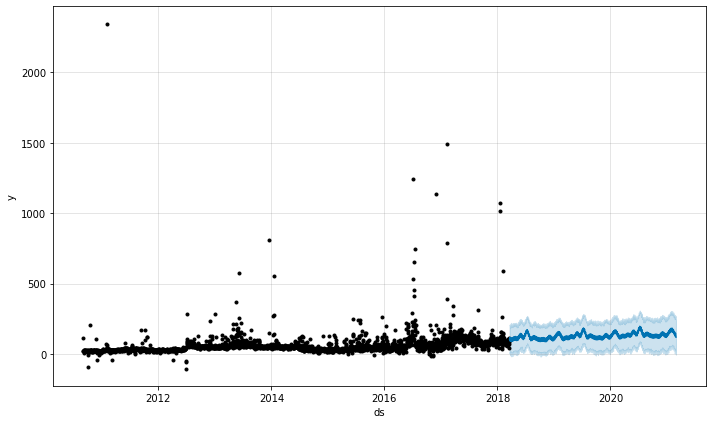

In [29]:
model.plot(forecast)
plt.show()

Multivariate

In [30]:
df_daily = df_daily.rename(columns={ "SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" })
df_daily.head()

,ds,add2,add1,add3,y
0,2010-09-01,15.8,1731.890833,3.69,114.654167
1,2010-09-02,15.4,1620.791250,3.69,23.783750
2,2010-09-03,18.3,1736.073333,4.45,21.040625
3,2010-09-04,13.7,1484.920208,3.39,20.928125
4,2010-09-05,14.9,1483.808750,4.45,20.856458


In [31]:
test_size = 3834 - 2757
df_train = df_daily[:-test_size]
df_test = df_daily[-test_size:]
test_size

1077

In [32]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
forecast = model.predict(df_test.drop(columns="y"))

In [34]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 2018-03-20   82.947371   -2.619266  178.655220
1 2018-03-21   82.588850   -2.388110  172.730411
2 2018-03-22  120.942749   24.207211  206.329274
3 2018-03-23  107.784416   20.456409  200.984374
4 2018-03-24   59.984934  -37.835420  150.684994


In [35]:
# calculate MAE between expected and predicted values for december
y_true = df_daily['y'][-1077:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 41.420
RMSE: 112.917552


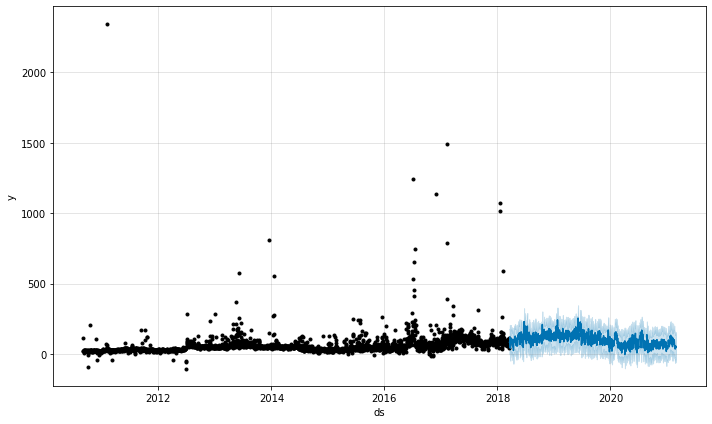

In [36]:
model.plot(forecast)
plt.show()

In [37]:
actual = y_true
forecasted = y_pred
# Consider a list APE to store the
# APE value for each of the records in dataset
APE = []
  
# Iterate over the list values
for day in range(5):
  
    # Calculate percentage error
    per_err = (actual[day] - forecasted[day]) / actual[day]
  
    # Take absolute value of
    # the percentage error (APE)
    per_err = abs(per_err)
  
    # Append it to the APE list
    APE.append(per_err)
  
# Calculate the MAPE
MAPE = sum(APE)/len(APE)
  
# Print the MAPE value and percentage
print(f'''
MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } %
''')


MAPE   : 0.18
MAPE % : 17.78 %

